# Data Storytelling

## Introduction

The Heart Attack Risk Prediction Dataset serves as a valuable resource for finding the intricate dynamics of heart health and its predictors. By employing predictive analytics and machine learning on features relevant to heart health and lifestyle choices, researchers and healthcare professionals can work towards proactive strategies for heart disease prevention and management. 

This dataset encapsulates a diverse range of attributes including age, cholesterol levels, blood pressure, smoking habits, exercise patterns, dietary preferences, and more, aiming to elucidate the complex interplay of these variables in determining the likelihood of a heart attack. The dataset stands as a testament to collective efforts to enhance our understanding of cardiovascular health and pave the way for a healthier future.

In [4]:
# Import Libraries
import requests
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import LabelEncoder
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
pd.options.mode.copy_on_write = True

In [5]:
# Read CSV File to DataFrame
data = pd.read_csv('../data/raw/heart_attack_prediction_dataset.csv')
# Set Patient ID as Index
data.set_index('Patient ID', inplace=True)

## Explore the Data

### What features dataset has?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

There are 24 features in the dataset. 19 of them are numerical and 6 of them are categorical

### How many data records we have?

In [10]:
data.shape

(8763, 25)

There are 8763 records in the dataset

### How data looks like?

In [12]:
#Call the head method on data to print the first 5 rows of the data
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Is there any missing values?

In [14]:
# Check missing values
data.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

There is no missing values

### Look at the summary statistics of numeric features

In [16]:
# Numeric data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


### Is there any data cleanup required?

Values in columns Exercise Hours Per Week, Sedentary Hours Per Day and BMI is float. Round these values to 3 decimal places

In [19]:
# Round values to 3 decimal places
data['Exercise Hours Per Week'] = round(data['Exercise Hours Per Week'], 3)
data['Sedentary Hours Per Day'] = round(data['Sedentary Hours Per Day'], 3)
data['BMI'] = round(data['BMI'], 3)

### How distribution Of Numerical Feature Values looks like?

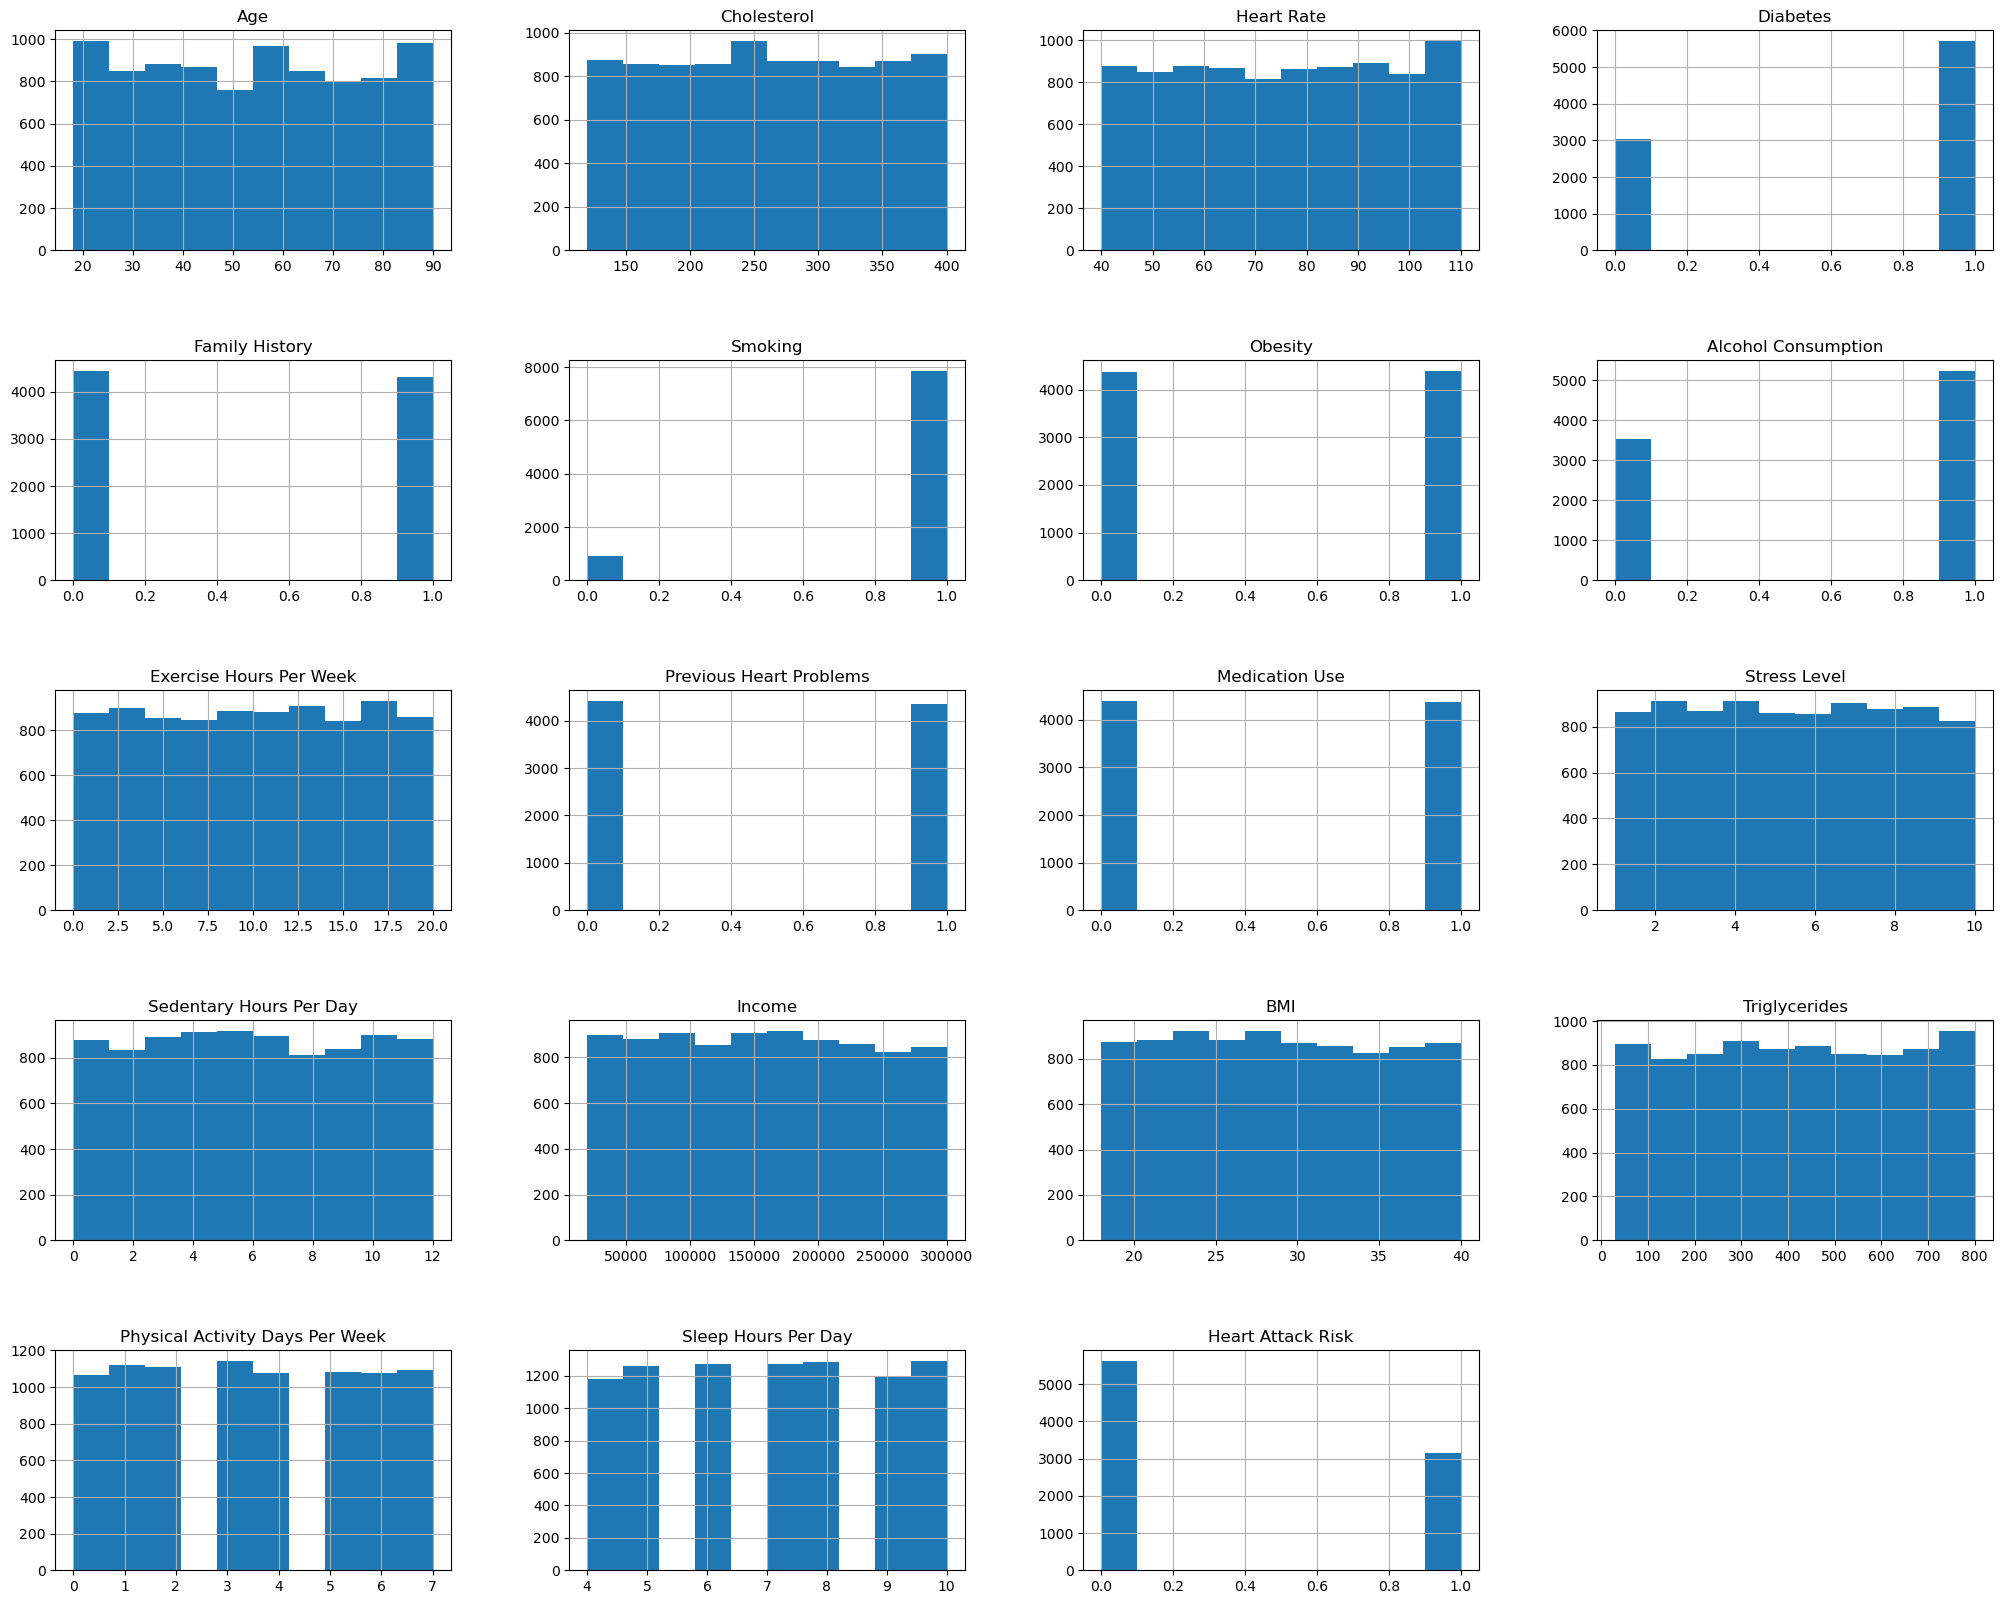

In [21]:
data.hist(figsize=(25,20))
plt.subplots_adjust(hspace=0.5)

Distribution looks good for all features

### Is there any data cleanup required for Categorical Features?

#### Blood Pressure

Blood Pressure values are String with Systolic and Diastolic value. These values can split into two numeric values

In [26]:
# Split the values and keep it as seperate columns in data set

data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

Systolic and Diastolic colums are object types and covert that to int

In [28]:
# Convert Systolic and Diastolic columns to int type

data['Systolic'] = data['Systolic'].astype(int)
data['Diastolic'] = data['Diastolic'].astype(int)

#### Other Categorical Features

Remaining Categorical Features are 

* Sex
* Diet
* Country
* Continent
* Hemisphere

In [31]:
# categorical features
categorical_columns = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']


Values in these categorical fields looks good and no further cleanup required

In [33]:
def plotPatientsWithHeartRateRisk(df, column):
    """
        Find No of Patients with Heart Rate Risk and Not with Heart Rate Risk
        Then Plot Bar Graph for the feature column
    """
    heart_attack_risk_by_feature = df.groupby([column, "Heart Attack Risk"]).count().reset_index()
    heart_attack_risk_by_feature = heart_attack_risk_by_feature[[column, "Heart Attack Risk", "Age"]]
    heart_attack_risk_by_feature = heart_attack_risk_by_feature.rename(columns={'Age': 'Count'})

    ha = heart_attack_risk_by_feature
    ha = ha.pivot(index=column, columns="Heart Attack Risk", values='Count')
    ha = ha.reset_index()
    ha = ha.rename(columns={0: 'No Risk'})
    ha = ha.rename(columns={1: 'Risk'})
    ha = ha.set_index(column)

    ha.plot(kind='bar', figsize=(20, 6))
    plt.title('Patients with Heart Attack Risk by ' + column)
    plt.xlabel(column)
    plt.ylabel('No of Patients')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#### How distributions Of Categorical Feature Values by Heart Attack Risk

#### Sex

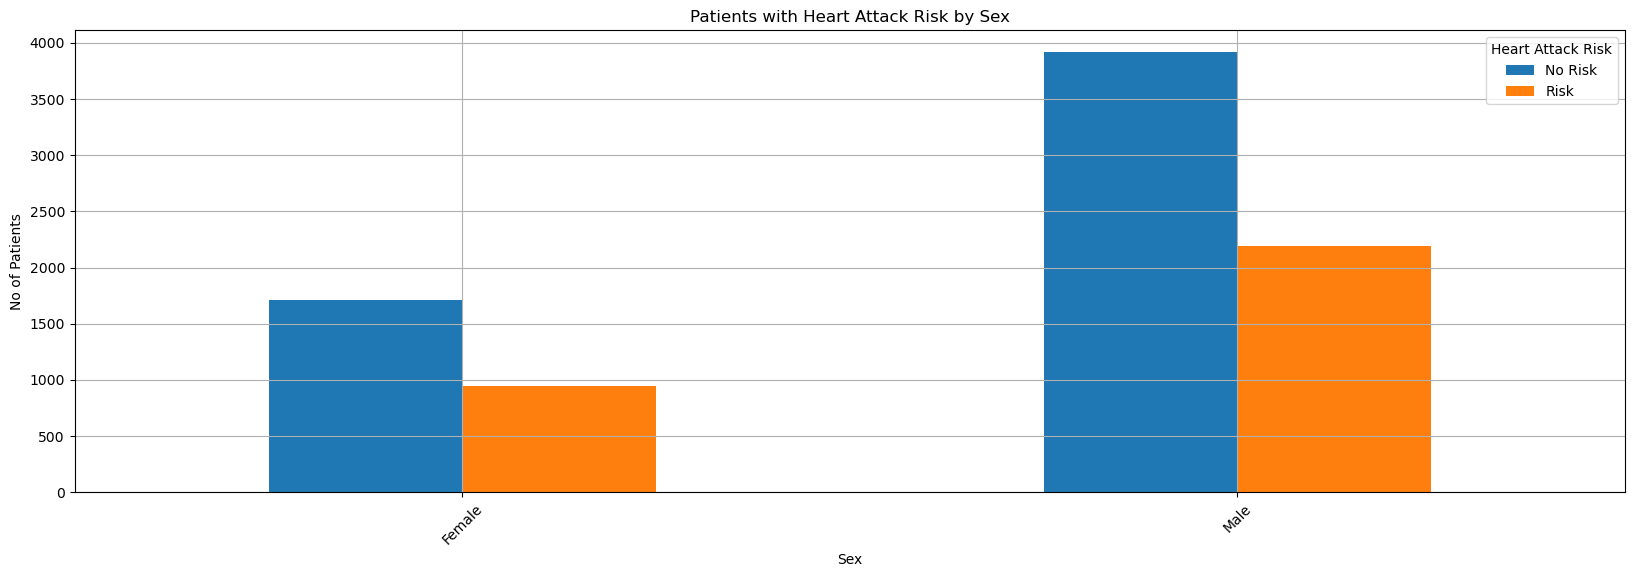

In [36]:
# Distribution for feature Sex
plotPatientsWithHeartRateRisk(data, categorical_columns[0])

#### Diet

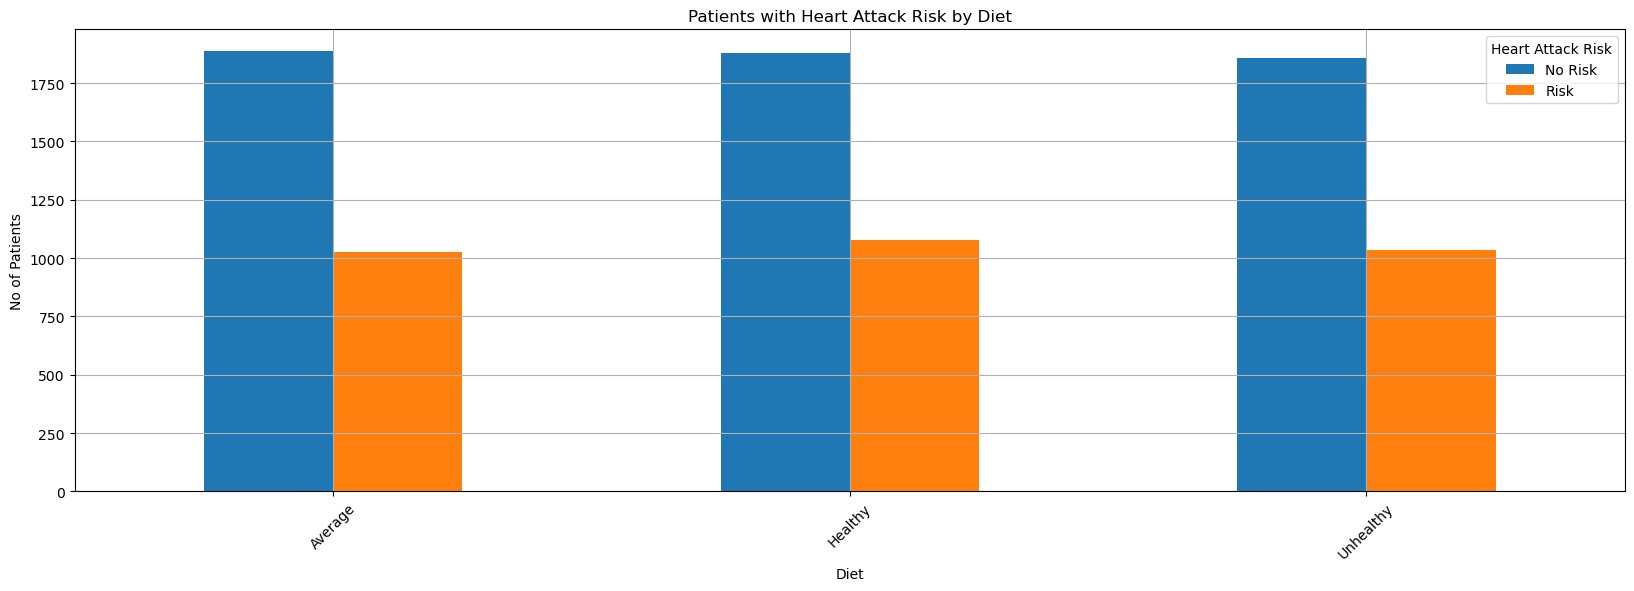

In [38]:
# Distribution for feature Diet
plotPatientsWithHeartRateRisk(data, categorical_columns[1])

#### Country

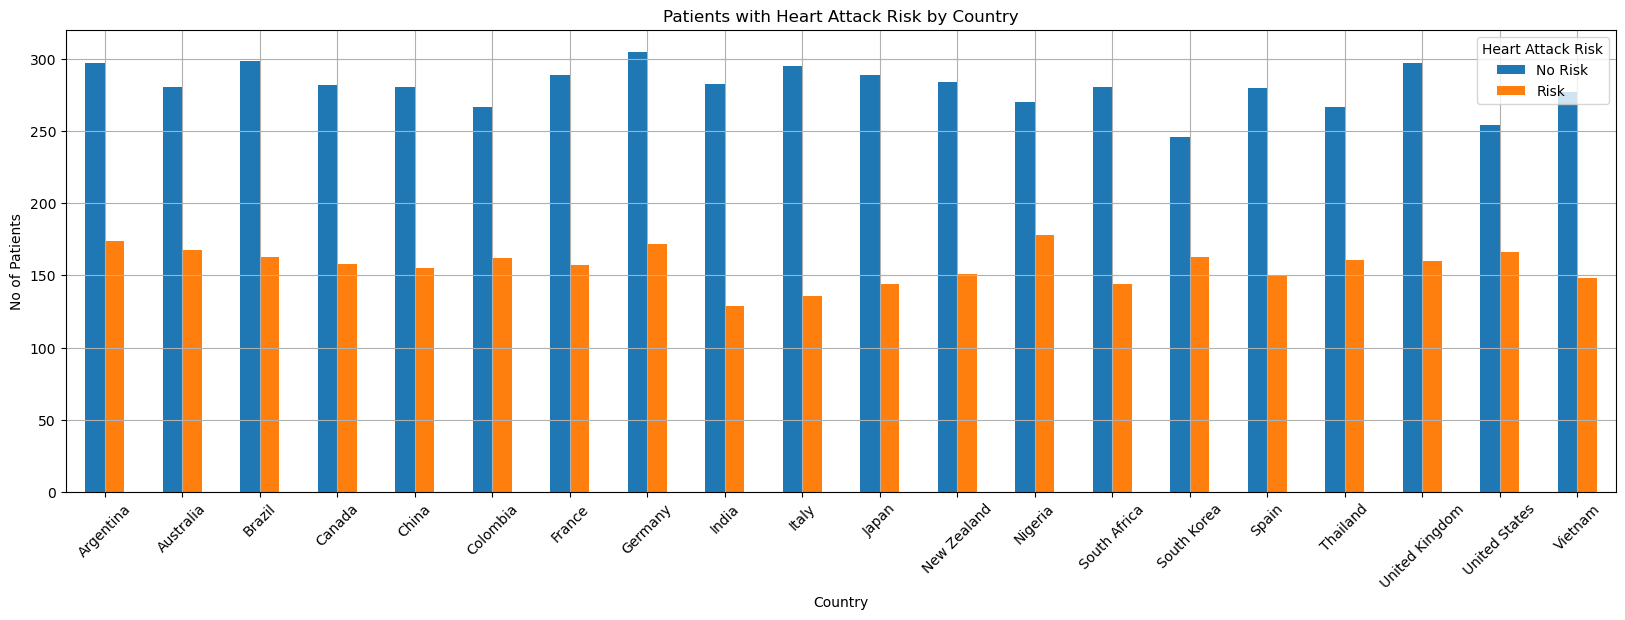

In [40]:
# Distribution for feature Country
plotPatientsWithHeartRateRisk(data, categorical_columns[2])

#### Continent

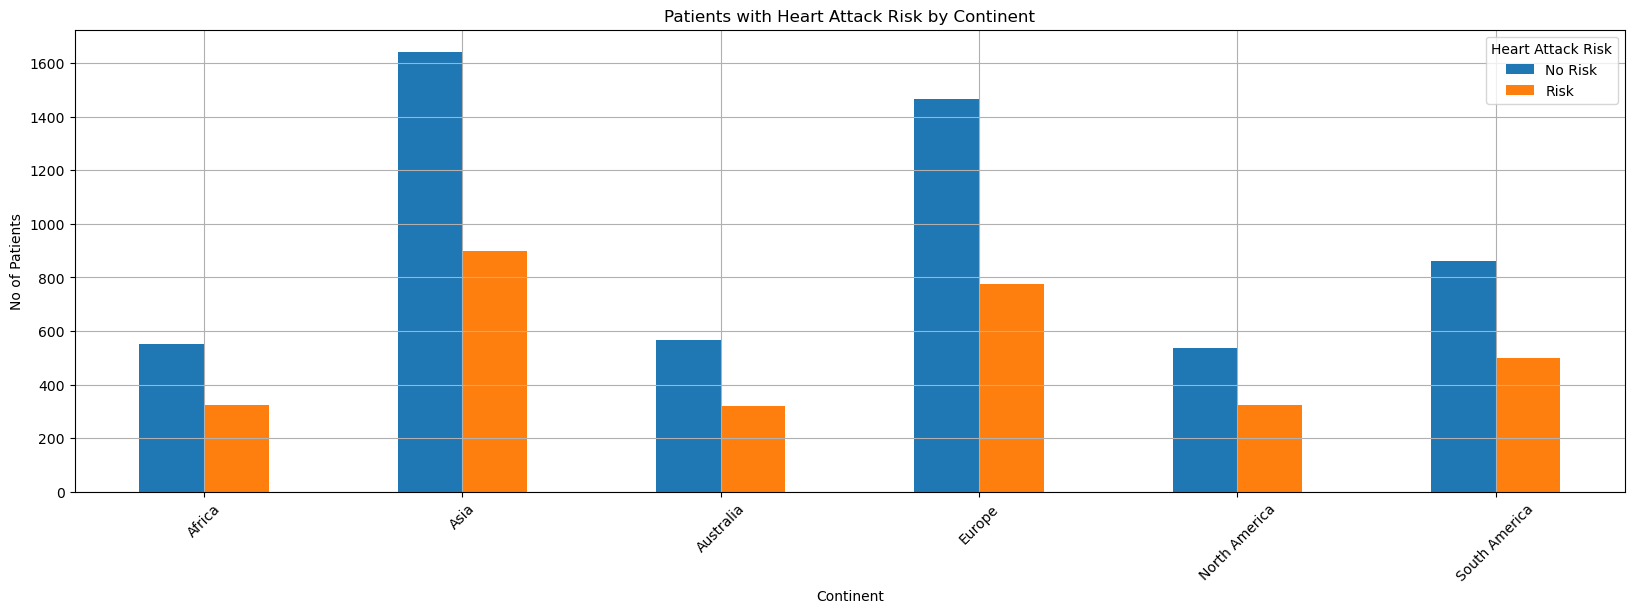

In [42]:
# Distribution for feature Continent
plotPatientsWithHeartRateRisk(data, categorical_columns[3])

#### Hemisphere

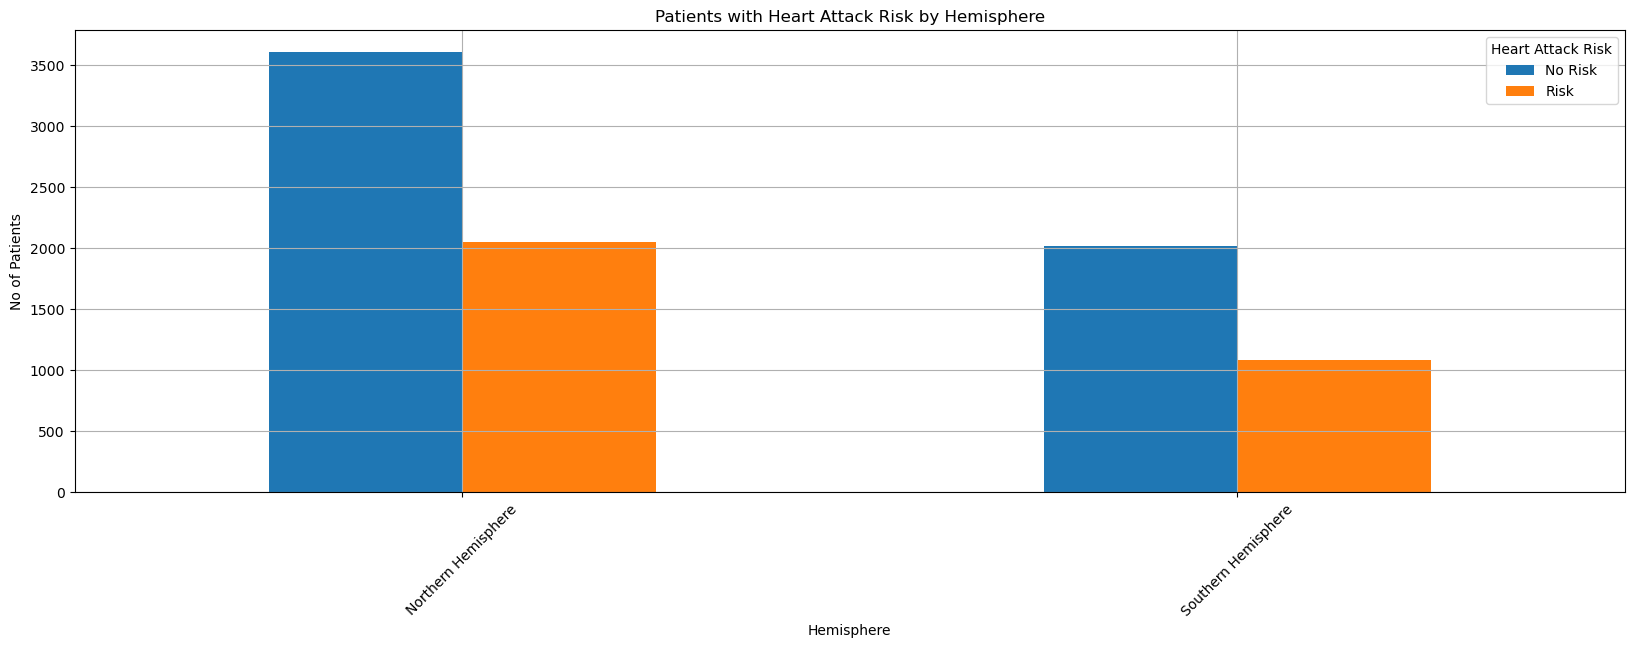

In [44]:
# Distribution for feature Hemisphere
plotPatientsWithHeartRateRisk(data, categorical_columns[4])

## Exploratory Data Analysis

In this step, examine and visualize dataset to gain insights about its characteristics, identify patterns, spot anomalies, and understand relationships between variables before building predictive models, essentially laying the foundation for further analysis by uncovering key trends and potential issues within the data

In [47]:
# Get a list of the values of the target variable, and the number of occurrences of each. 
data["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

## Do we need to encode any features for Visualizing?

There are categorical fields. Lets Label Encode for Visualizing

In [50]:
# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform the data
encoded_country = le.fit_transform(data['Country'])
encoded_sex = le.fit_transform(data['Sex'])
encoded_diet = le.fit_transform(data['Diet'])
encoded_continent = le.fit_transform(data['Continent'])
encoded_hemisphere = le.fit_transform(data['Hemisphere'])

In [51]:
data_encoded = data.copy()
data_encoded['Encoded Country'] = encoded_country
data_encoded['Encoded Sex'] = encoded_sex
data_encoded['Encoded Diet'] = encoded_diet
data_encoded['Encoded Continent'] = encoded_continent
data_encoded['Encoded Hemisphere'] = encoded_hemisphere

In [52]:
data_encoded.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Encoded Country,Encoded Sex,Encoded Diet,Encoded Continent,Encoded Hemisphere
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,South America,Southern Hemisphere,0,158,88,0,1,0,5,1
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,North America,Northern Hemisphere,0,165,93,3,1,2,4,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,Europe,Northern Hemisphere,0,174,99,6,0,1,3,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,North America,Northern Hemisphere,0,163,100,3,1,0,4,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,Asia,Northern Hemisphere,0,91,88,16,1,2,1,0


Encoded columns are added at the end. Lets remove the categorical columns now

In [54]:
columns_to_drop = ['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
data_encoded.drop(columns_to_drop, axis=1, inplace=True)

Rename the columns now

In [56]:
data_encoded.rename(columns={'Encoded Country': 'Country', 
                         'Encoded Sex' : 'Sex',
                         'Encoded Diet': 'Diet',
                            'Encoded Continent': 'Continent',
                            'Encoded Hemisphere': 'Hemisphere',
                           }, inplace=True)

## What are the steps for Visualization? Do we need to scale data?

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features

#### Scale the data

In [60]:
data_scaled = scale(data_encoded)

##### Verifying the scaling

In [62]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Country,Sex,Diet,Continent,Hemisphere
0,0.625557,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010870,-0.991704,...,-1.528843,-0.514750,-0.74709,0.870044,0.193782,-1.620793,0.658765,-1.225914,1.609515,1.350571
1,-1.539322,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418069,1.008365,...,-1.090738,-0.011823,-0.74709,1.135714,0.534480,-1.102536,0.658765,1.231804,0.983525,-0.740428
2,-1.539322,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372248,1.008365,...,0.223577,-1.520604,-0.74709,1.477290,0.943319,-0.584279,-1.517992,0.002945,0.357535,-0.740428
3,1.425621,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032210,1.008365,...,-0.214528,-1.520604,-0.74709,1.059809,1.011458,-1.102536,0.658765,-1.225914,0.983525,-0.740428
4,0.578495,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727992,1.008365,...,-1.090738,-1.017677,-0.74709,-1.672797,0.193782,1.143245,0.658765,1.231804,-0.894445,-0.740428


This agrees with the expectation.

#### How Cumulative variance ratio explained by PCA components?

Fit the PCA transformation using the scaled data.

In [66]:
data_pca = PCA().fit(data_scaled_df)
data_pca.explained_variance_ratio_.cumsum()

array([0.06499401, 0.12749546, 0.16915531, 0.21030175, 0.25100033,
       0.29124655, 0.33130768, 0.37097163, 0.41049039, 0.44980817,
       0.48870293, 0.52723326, 0.56555232, 0.60367914, 0.64154598,
       0.67924877, 0.71690484, 0.75413367, 0.79078979, 0.82716253,
       0.86330784, 0.89934957, 0.93470415, 0.96525857, 0.98616915,
       1.        ])

Plot the cumulative variance ratio with number of components.

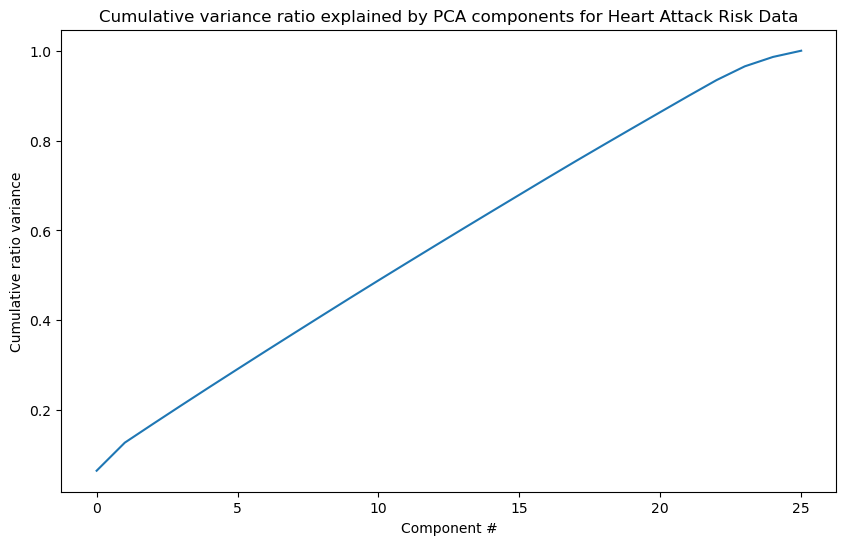

In [68]:
plt.subplots(figsize=(10, 6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Heart Attack Risk Data');

This shows First component 'Age' 15% of Variance. About 80% of Variance is from first 15 Components

#### Verify Feature correlation

In [71]:
data_encoded.corr()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Country,Sex,Diet,Continent,Hemisphere
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,...,0.001384,-0.002185,0.006403,0.003070,-0.009826,0.002567,0.020067,0.002104,-0.010387,-0.002795
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,...,0.016056,0.004456,0.019340,0.000133,0.002083,0.012962,0.007614,0.003582,0.008892,-0.019462
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008277,-0.004956,...,0.000834,0.001811,-0.004251,0.008482,-0.018113,-0.016436,-0.010921,-0.016409,0.000975,0.010145
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,...,-0.002411,-0.012457,0.017225,-0.005306,-0.000512,0.011031,0.003582,-0.001561,-0.002445,0.001478
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,...,0.009561,-0.011199,-0.001652,-0.009762,0.017818,-0.003194,0.002180,0.012721,0.006055,-0.004163
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,...,-0.006465,-0.005424,-0.004051,-0.009534,-0.012293,0.021095,0.514837,-0.012986,-0.013697,0.002439
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002098,0.005159,...,0.005337,-0.005314,-0.013318,-0.001918,-0.020574,-0.009631,0.002376,-0.008546,0.001377,-0.008555
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,...,0.001593,-0.000843,-0.013778,0.010764,-0.007282,0.013029,0.002085,-0.000698,0.005013,-0.012095
Exercise Hours Per Week,0.001206,0.021517,0.008277,-0.007014,-0.006378,-0.000150,0.002098,-0.008514,1.000000,0.005253,...,0.007725,-0.001245,0.011133,-0.009506,-0.003470,0.005799,-0.006976,0.002653,-0.002927,-0.007485
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,...,0.008537,0.004460,0.000274,-0.011926,0.008813,0.001871,0.001964,-0.013347,0.021525,0.017384


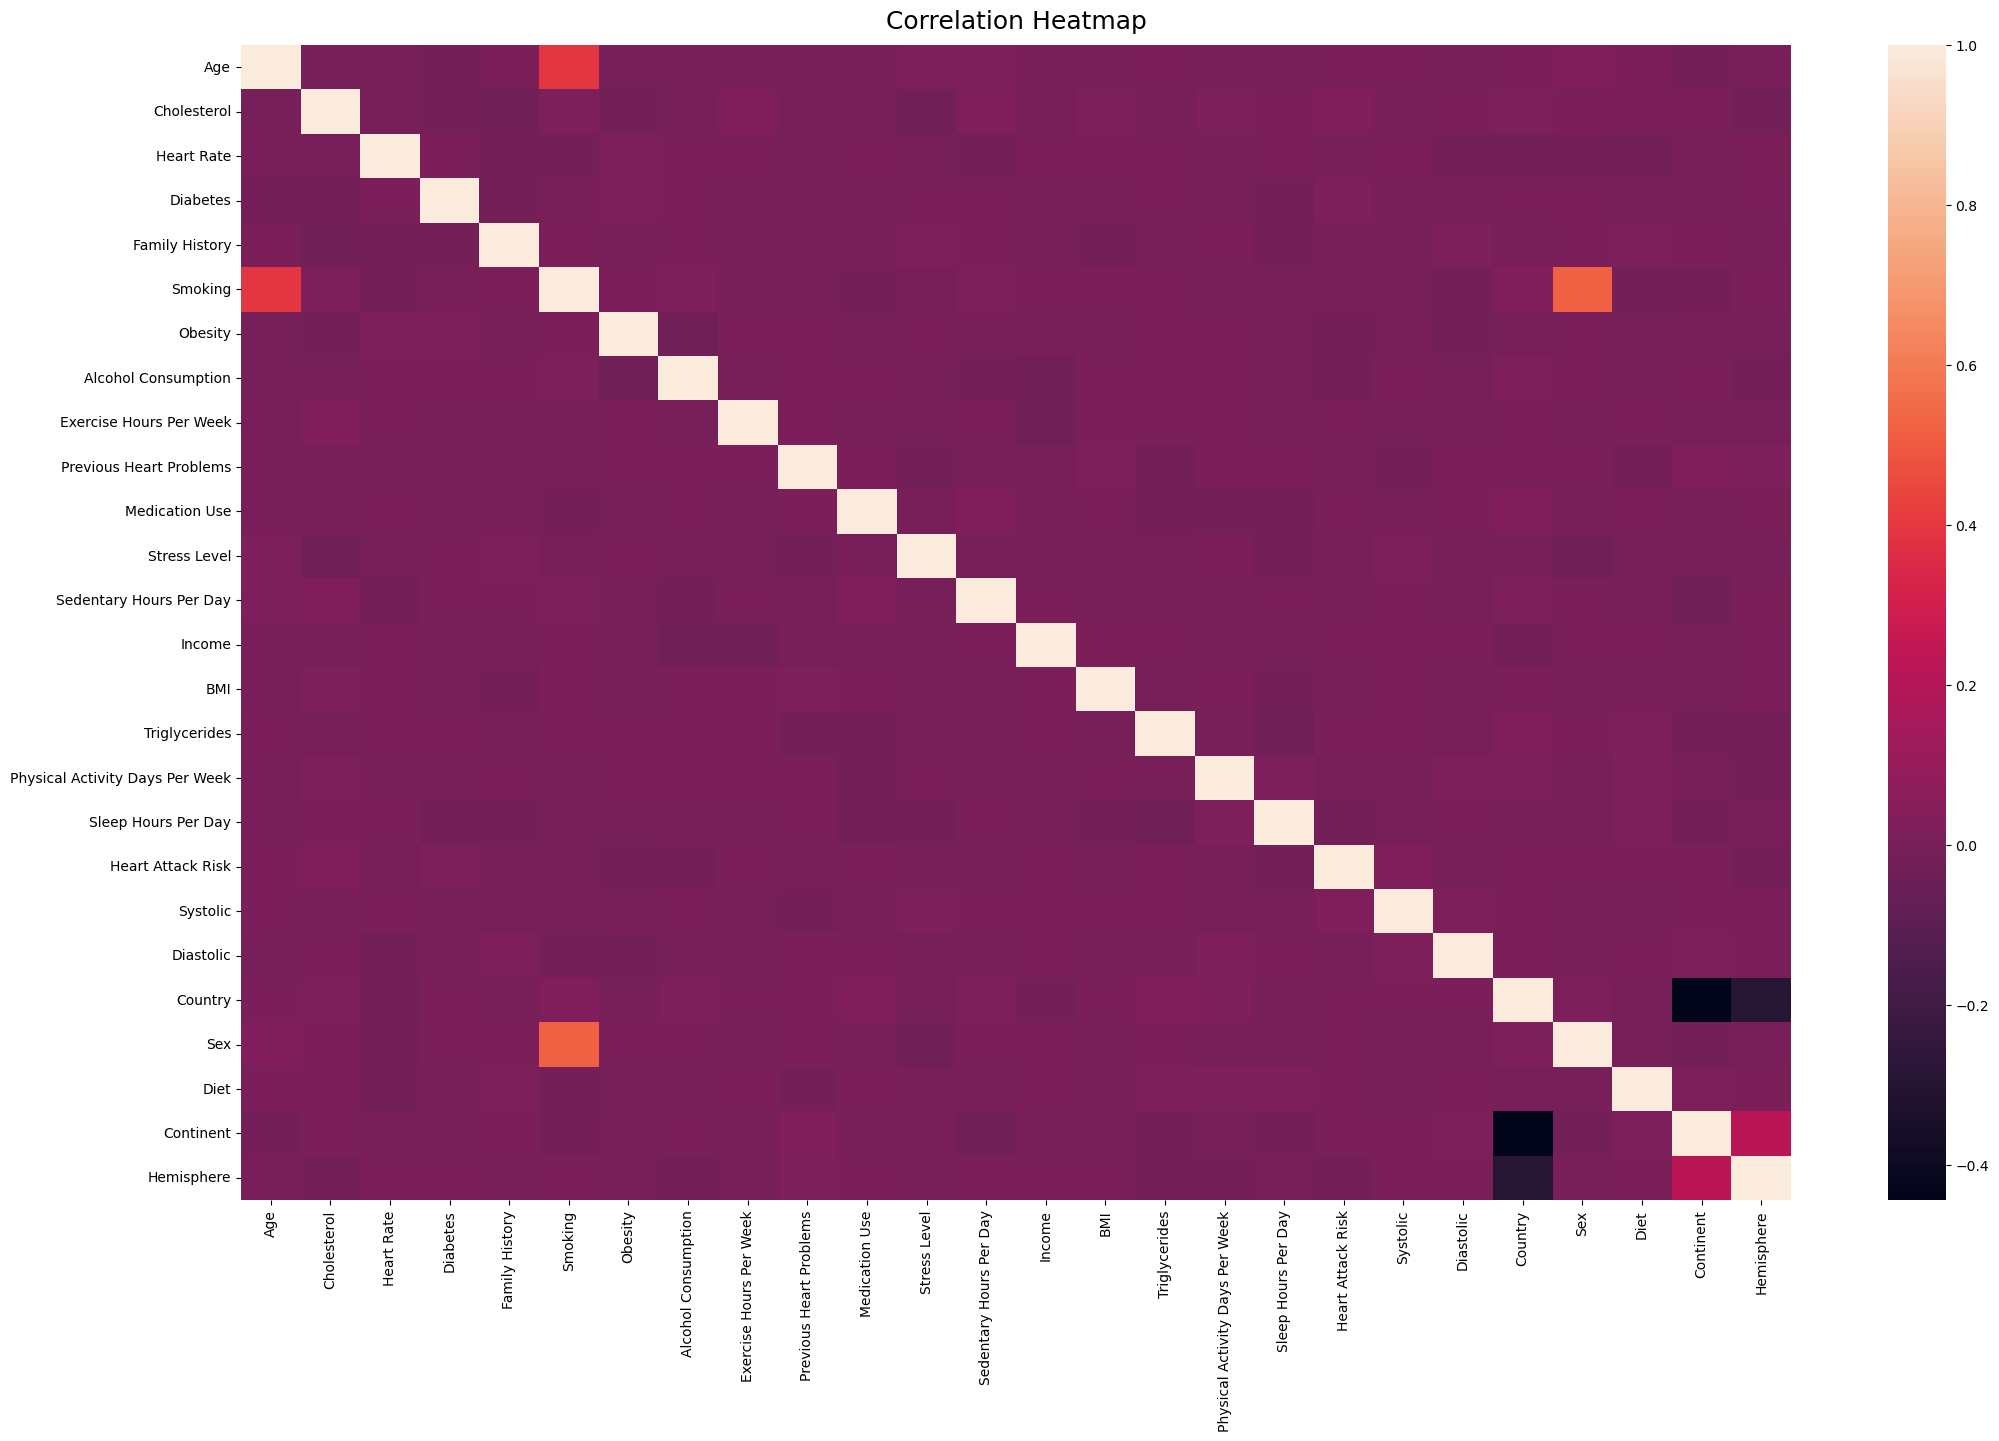

In [72]:
# Make a heatmap of the data 
plt.figure(figsize=(25,15))
heatmap = sns.heatmap(data_encoded.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

***These features shows Positive Correlations with the target feature 'Heart Attack Risk'***

* Cholesterol
* Diabetes
* Exercise Hours Per Week
* Triglycerides
* Systolic
* Age
* Previous Heart Problems
* Medication Use
* Income
* Country
* Sex
* Diet
* Continent

This almost matches with what we saw in PCA

In [74]:
feature_values = ["Cholesterol", "Diabetes", "Exercise Hours Per Week", "Triglycerides", "Systolic", "Age", 
                      "Previous Heart Problems", "Medication Use", "Heart Attack Risk"]

data_with_selected_features = data[feature_values]

#### Do we need to categorize any numerical values for Visualization?

***For visualization, map Cholesterol values to categories***

* Health Health - < 200
* At Risk - Between 200 and 240 
* Dangerous - > 240

In [77]:
data_with_selected_features.loc[:, 'Cholesterol Level'] = data_with_selected_features["Cholesterol"].astype(str)

In [78]:
data_with_selected_features.loc[data_with_selected_features['Cholesterol'] < 200, 'Cholesterol Level'] = 'Hearty Health'
data_with_selected_features.loc[(data_with_selected_features['Cholesterol'] >= 200) & (data_with_selected_features['Cholesterol'] < 240), 'Cholesterol Level'] = 'At Risk'
data_with_selected_features.loc[data_with_selected_features['Cholesterol'] >= 240, 'Cholesterol Level'] = 'Dangerous'

***Do same for Blood Pressure***

* Healthy - Systolic < 120
* Elevated - Systolic Between 120 and 130 
* Stage 1 Hypertension - Systolic Between 130 and 140 
* Stage 2 Hypertension - Systolic Between 140 and 180 
* Hypertension Crisis - Systolic >= 180

In [80]:
data_with_selected_features.loc[:, 'Blood Pressure'] = data_with_selected_features['Systolic'].astype(str)

In [81]:
data_with_selected_features.loc[data_with_selected_features['Systolic'] < 120, 'Blood Pressure'] = 'Healthy'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 120) & (data_with_selected_features['Systolic'] < 130), 'Blood Pressure'] = 'Elevated'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 130) & (data_with_selected_features['Systolic'] < 140), 'Blood Pressure'] = 'Stage 1 Hypertension'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 140) & (data_with_selected_features['Systolic'] < 180), 'Blood Pressure'] = 'Stage 2 Hypertension'
data_with_selected_features.loc[data_with_selected_features['Systolic'] >= 180, 'Blood Pressure'] = 'Hypertension Crisis'

In [82]:
data_with_selected_features.head()

,Cholesterol,Diabetes,Exercise Hours Per Week,Triglycerides,Systolic,Age,Previous Heart Problems,Medication Use,Heart Attack Risk,Cholesterol Level,Blood Pressure
Patient ID,,,,,,,,,,,
BMW7812,208,0,4.168,286,158,67,0,0,0,At Risk,Stage 2 Hypertension
CZE1114,389,1,1.813,235,165,21,1,0,0,Dangerous,Stage 2 Hypertension
BNI9906,324,1,2.078,587,174,21,1,1,0,Dangerous,Stage 2 Hypertension
JLN3497,383,1,9.828,378,163,84,1,0,0,Dangerous,Stage 2 Hypertension
GFO8847,318,1,5.804,231,91,66,1,0,0,Dangerous,Healthy


## How positive correlated features compared to target feature Heart Attack Risk?

In [84]:
def draw_box_plot(xcol, ycol):
    plt.figure(figsize= (5, 5))
    sns.set_theme(style="ticks", palette="pastel")
    ax = sns.boxplot(x=xcol, y=ycol,  hue="Heart Attack Risk",
                 palette="pastel", data=data_with_selected_features)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.despine(offset=1, trim=True) 
    plt.xticks(rotation=45)

##### Boxplot Cholestrol vs Age

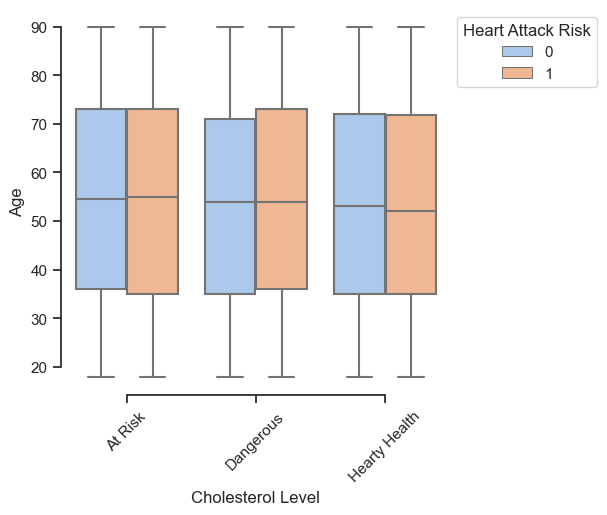

In [86]:
draw_box_plot("Cholesterol Level", "Age")

This shows older patients with cholestrol has more chances for heart attack 

##### Boxplot Cholestrol vs Triglycerides

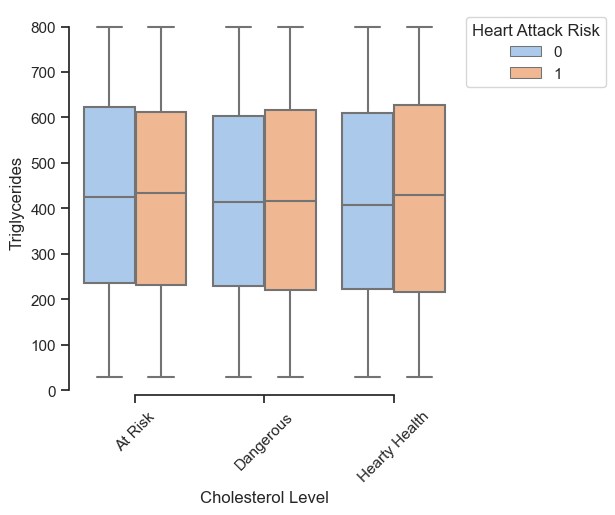

In [89]:
draw_box_plot("Cholesterol Level", "Triglycerides")

This does not tell any clear picture on whether patients with cholestrol and tryglicerides has chances for heart attack

##### Boxplot Cholestrol vs Systolic

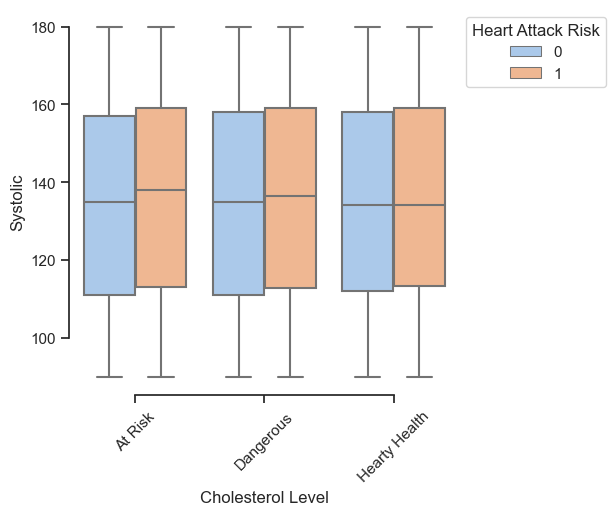

In [92]:
draw_box_plot("Cholesterol Level", "Systolic")

This shows patients with cholestrol and blood pressure has more chances for heart attack 

##### Boxplot Cholestrol vs Exercise

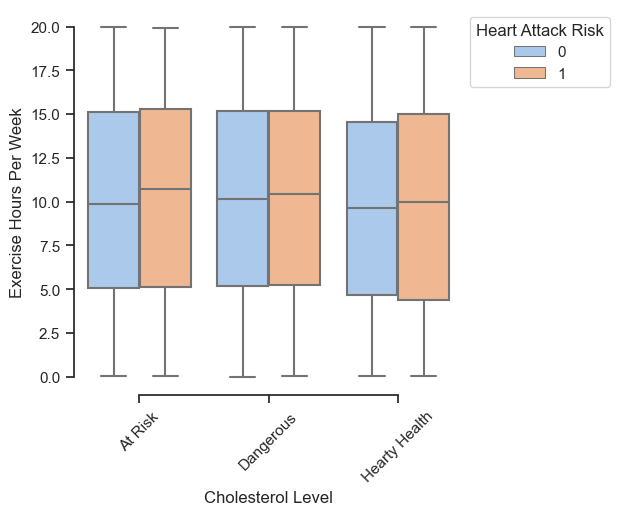

In [95]:
draw_box_plot("Cholesterol Level", "Exercise Hours Per Week")

This does not tell any clear picture on whether patients with cholestrol who does exercises has chances for heart attack

##### Boxplot Blood Pressure vs Age

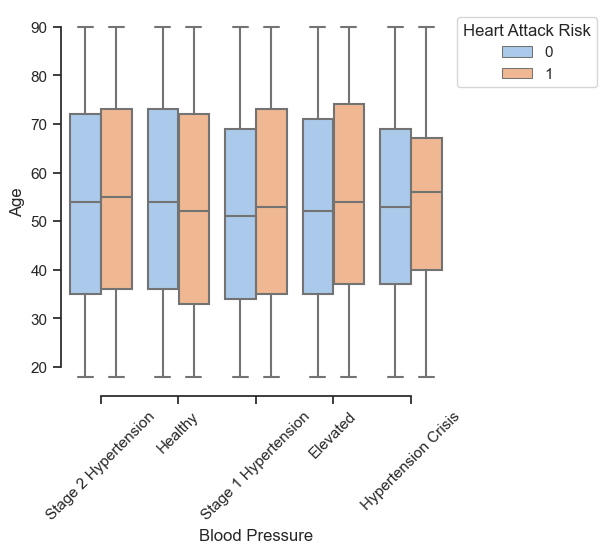

In [98]:
draw_box_plot("Blood Pressure", "Age")

This shows older patients with Blood Pressure has more chances for heart attack 

##### Boxplot Blood Pressure vs Triglycerides

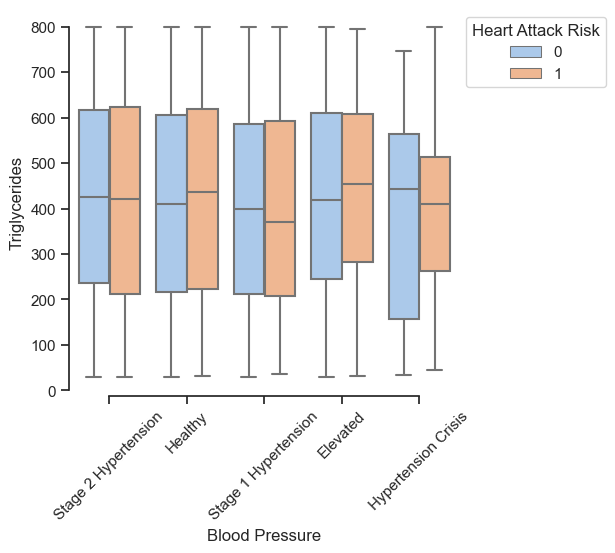

In [101]:
draw_box_plot("Blood Pressure", "Triglycerides")

This does not tell any clear picture on whether patients with Blood Pressure and tryglicerides has chances for heart attack

##### Boxplot Blood Pressure vs Cholesterol

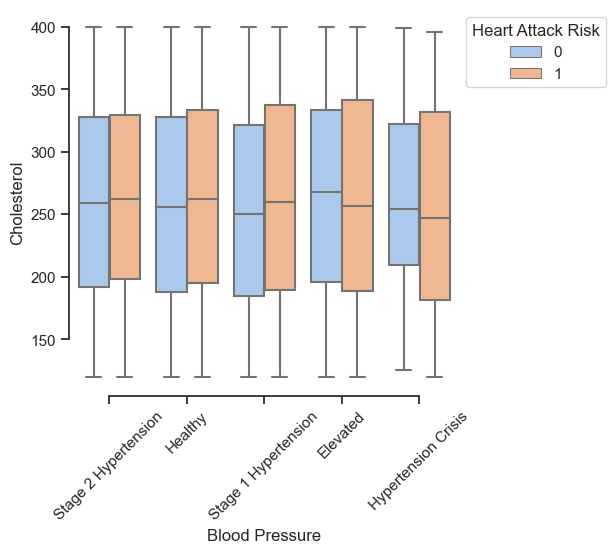

In [104]:
draw_box_plot("Blood Pressure", "Cholesterol")

This does not tell any clear picture on whether patients with Blood Pressure and Cholestrol has chances for heart attack

##### Boxplot Blood Pressure vs Exercise

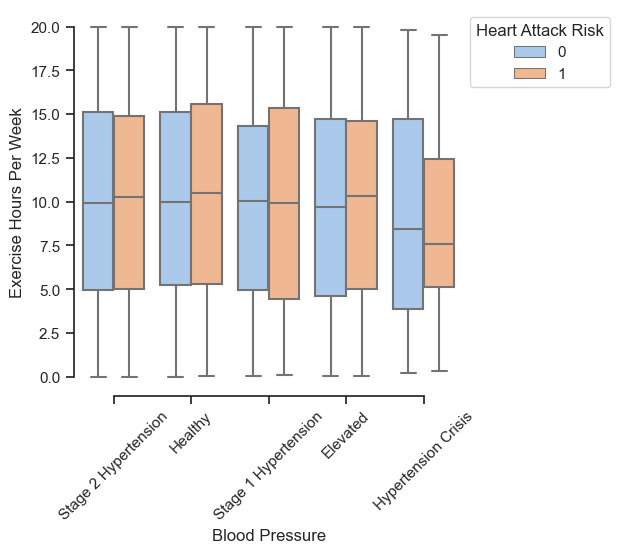

In [107]:
draw_box_plot("Blood Pressure", "Exercise Hours Per Week")

This does not tell any clear picture on whether patients with Blood Pressure who does exercises has chances for heart attack

## 3.8 Summary<a id='3.8_Summary'></a>

Initial Heart Risk Prediction contains 8763 rows and 25 columns. There was no missing data in the dataset.

**Categorical Features**

These are the categorical features and all has valid values

* Blood Pressure - This column is type string with Systolic and Diastolic values seperated by /. This value converted into two seperate columns Systolic and Diastolic
* Sex - This column has values Male and Female
* Diet - This column has values Healthy, Average and Unhealthy
* Country - This column has valid country names.
* Continent - This column has valid continents.
* Hemisphere - This column has values Northern Hemisphere and Southern Hemisphere

Distribution of these features related to Heart Attack Risk feature looks good and all these can be considered for next steps.

**Numeric Features**

***These are the features with variable values. Feature values Exercise Hours Per Week, Sedentary Hours Per Day and BMI is float. Rounded these values to 3 decimal places. These has an even distribution except for Physical Activity Days Per Week and Sleep Hours Per Day and good for next steps***

* Age
* Cholesterol
* Heart Rate
* Exercise Hours Per Week
* Stress Level
* Sedentary Hours Per Day
* Income
* BMI
* Triglycerides
* Physical Activity Days Per Week
* Sleep Hours Per Day

***These are the features with yes/no values. These has an acceptable distribution that we can keep it for next steps and no further cleanup required***

* Diabetes
* Family History
* Smoking
* Obesity
* Alcohol Consumption
* Previous Heart Problems
* Heart Attack Risk

**Target Feature**

After the data correction, dataset has 8763 rows and 27 columns. 

**Target Feature we are looking is "Heart Attack Risk". All other feature values looks good to find a correlation with the target feature and modelling in next steps.**

As part of exploratory data analysis, identified top features which has more correlation with heart attack risk which we can use to test/train the model in coming steps.

* Heart Attack risk has highest correlation with 
    * Cholesterol
    * Diabetes
    * Exercise Hours Per Week
    * Triglycerides
    * Systolic
    * Age
    * Previous Heart Problems
    * Medication Use
* Older patients with cholestrol has more chances for heart attack 
* Patients with cholestrol and blood pressure has more chances for heart attack 
* Older patients with Blood Pressure has more chances for heart attack 
* Alcohol Consumption has no stronger link with Heart Attack Risk
* Smoking is not a major cause of Heart Attack